In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load dataset
DataFrame= {
    'hp': { 'training':  '', 'testing': '' }
}


DataFrame['hp']['training'] = pd.read_csv("Dataframe kesegaran [HP][Training].csv")
DataFrame['hp']['testing'] = pd.read_csv("Dataframe kesegaran [HP][Testing].csv")

In [3]:
DataFrame['hp']['training']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,20200713_122216.jpg,86.834461,180.486267,82.895608,114.212784,0.000808,0.000772,0.000802,0.000795,0.294752,...,1.194064e-08,1.006032e-08,0.513658,0.498590,0.585399,0.531546,0.039679,0.835914,0.526253,0
1,20200713_122401.jpg,306.555057,493.008184,317.049028,497.513423,0.000455,0.000434,0.000454,0.000433,0.170008,...,5.305295e-09,4.289468e-09,0.528285,0.525309,0.634179,0.561495,0.046532,0.574354,0.558195,0
2,20200713_122706.jpg,512.571051,828.379751,567.316129,766.123256,0.000397,0.000367,0.000393,0.000374,0.108700,...,2.258655e-09,2.045184e-09,0.582025,0.582751,0.657457,0.605711,0.036439,0.465119,0.605080,0
3,20200713_122930.jpg,234.465736,440.559489,310.669660,408.242296,0.000781,0.000709,0.000757,0.000721,0.143002,...,3.765430e-09,3.285336e-09,0.564120,0.554008,0.667310,0.593649,0.037230,0.753682,0.589146,0
4,20200713_123203.jpg,329.225640,589.283403,426.359990,529.204352,0.000521,0.000477,0.000504,0.000487,0.118289,...,2.392270e-09,2.204696e-09,0.549205,0.538962,0.662940,0.581767,0.047504,0.743506,0.577276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,augmnetasi_20200720_172528.jpg,26.357591,76.005456,56.450172,64.553475,0.001925,0.001874,0.001899,0.001898,0.505779,...,3.380528e-08,3.117488e-08,0.667467,0.676566,0.727138,0.688683,0.022485,0.396822,0.690748,2
270,augmnetasi_20200720_172611.jpg,12.773007,35.337901,23.001169,28.302809,0.000922,0.000927,0.000932,0.000930,0.553319,...,1.761774e-08,1.530782e-08,0.606408,0.614417,0.695831,0.638195,0.030309,0.338052,0.637874,2
271,augmnetasi_20200720_172738.jpg,85.391978,156.370141,101.360728,146.735693,0.001356,0.001277,0.001335,0.001287,0.259649,...,7.864462e-09,6.827210e-09,0.563615,0.558633,0.689038,0.602459,0.041317,0.632191,0.598248,2
272,augmnetasi_20200720_172814.jpg,47.962660,99.316945,70.321235,106.720069,0.000768,0.000758,0.000768,0.000756,0.402080,...,1.333277e-08,1.176282e-08,0.588228,0.589420,0.686665,0.619942,0.036161,0.535204,0.618498,2


In [4]:
DataFrame['hp']['testing']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,20200713_121834.jpg,334.288939,686.418935,502.231053,587.773886,0.000438,0.000398,0.000419,0.000409,0.148897,...,2.310940e-09,2.175691e-09,0.515687,0.515128,0.610288,0.546028,0.044610,0.519569,0.543711,0
1,20200713_122004.jpg,313.735236,472.801972,344.708661,559.870048,0.000377,0.000365,0.000375,0.000358,0.172259,...,3.883598e-09,3.143063e-09,0.539232,0.536229,0.657448,0.575874,0.052980,0.583955,0.572885,0
2,20200713_122829.jpg,232.546937,354.204476,262.255782,368.790502,0.000904,0.000854,0.000906,0.000846,0.189432,...,7.999925e-09,6.670220e-09,0.683134,0.682837,0.729271,0.697364,0.025568,0.495613,0.696924,0
3,20200713_123106.jpg,150.127584,268.808048,236.904528,317.283651,0.000939,0.000897,0.000915,0.000871,0.364109,...,1.649653e-08,1.395283e-08,0.688405,0.684885,0.720959,0.696596,0.022382,0.623695,0.696060,0
4,20200713_123734.jpg,499.763226,793.182528,558.743848,743.138260,0.000317,0.000299,0.000312,0.000302,0.083228,...,1.499202e-09,1.383672e-09,0.545591,0.538957,0.592528,0.557720,0.029396,0.688421,0.555651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,augmentasi20200720_173018.jpg,29.544537,69.084630,51.418369,69.236096,0.001247,0.001214,0.001222,0.001213,0.469182,...,1.912862e-08,1.598883e-08,0.611448,0.629344,0.694519,0.643739,0.025614,0.180806,0.646791,2
112,augmnetasi_20200720_171821.jpg,39.644500,89.927646,69.681225,95.869738,0.000669,0.000664,0.000664,0.000662,0.565411,...,3.218328e-08,2.703131e-08,0.668390,0.674014,0.704038,0.680978,0.017756,0.455654,0.682488,2
113,augmnetasi_20200720_172247.jpg,49.803519,130.465559,111.370817,151.546097,0.000667,0.000652,0.000655,0.000647,0.324203,...,8.734260e-09,7.166295e-09,0.611549,0.602913,0.690522,0.633325,0.034166,0.653875,0.630166,2
114,augmnetasi_20200720_172912.jpg,7.454048,36.090830,30.607837,33.085994,0.001742,0.001727,0.001737,0.001732,0.616622,...,2.717270e-08,2.447741e-08,0.689379,0.695153,0.725439,0.701965,0.016626,0.485759,0.703644,2


# RGB

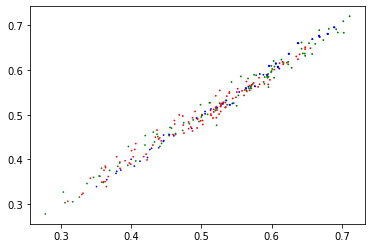

In [5]:
data_feature_training = DataFrame['hp']['training'][['r', 'g', 'b']]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['r', 'g', 'b']]
data_class_testing = DataFrame['hp']['testing']["class"]


colors = {0: 'r' , 1 : 'g' , 2: 'b' ,}
plt.scatter(data_feature_training['r'], 
            data_feature_training['g'], 
            data_feature_training['b'], 
            c=[colors[k] for k in data_class_training])

In [6]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        49
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        27

    accuracy                           0.42       116
   macro avg       0.14      0.33      0.20       116
weighted avg       0.18      0.42      0.25       116

[[49  0  0]
 [40  0  0]
 [27  0  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [7]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.71      0.56        49
           1       0.35      0.35      0.35        40
           2       0.00      0.00      0.00        27

    accuracy                           0.42       116
   macro avg       0.27      0.35      0.30       116
weighted avg       0.32      0.42      0.36       116

[[35 14  0]
 [26 14  0]
 [15 12  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[0.49994599894948544, 0.5265804439580108, 0.5490350252514201]
[0.4972076787426312, 0.526286676522994, 0.5486494608694171]
[0.604274167363268, 0.6287190704818111, 0.6444241107901494]


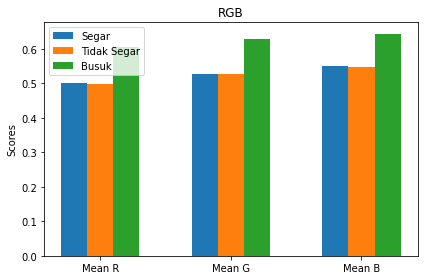

In [8]:
labels = ['Mean R', 'Mean G', 'Mean B']

dataframe = DataFrame['hp']['training'][['r', 'g', 'b', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


r_means = [np.mean(data_segar['r']), np.mean(data_tidak_segar['r']), np.mean(data_busuk['r'])]
print(r_means)
g_means = [np.mean(data_segar['g']), np.mean(data_tidak_segar['g']), np.mean(data_busuk['g'])]
print(g_means)
b_means = [np.mean(data_segar['b']), np.mean(data_tidak_segar['b']), np.mean(data_busuk['b'])]
print(b_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, r_means, width, label='Segar')
rects2 = ax.bar(x, g_means, width, label='Tidak Segar')
rects3 = ax.bar(x + width, b_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('RGB')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# HSI

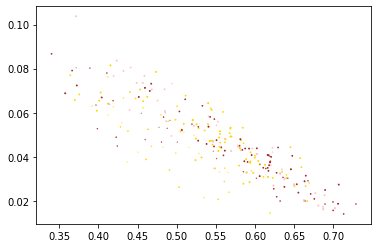

In [9]:
data_feature_training = DataFrame['hp']['training'][['h', 's', 'i']]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['h', 's', 'i']]
data_class_testing = DataFrame['hp']['testing']["class"]


colors = {0: 'gold' , 1 : 'brown' , 2: 'pink' ,}
plt.scatter(data_feature_training['h'], 
            data_feature_training['s'], 
            data_feature_training['i'], 
            c=[colors[k] for k in data_class_training])

In [10]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        49
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        27

    accuracy                           0.42       116
   macro avg       0.14      0.33      0.20       116
weighted avg       0.18      0.42      0.25       116

[[49  0  0]
 [40  0  0]
 [27  0  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.86      0.59        49
           1       0.33      0.10      0.15        40
           2       0.50      0.19      0.27        27

    accuracy                           0.44       116
   macro avg       0.43      0.38      0.34       116
weighted avg       0.42      0.44      0.36       116

[[42  5  2]
 [33  4  3]
 [19  3  5]]


[0.5324063376529221, 0.5591558630030958, 0.5793228201653925]
[0.04714877094426128, 0.044361472744936736, 0.04327378900779057]
[0.5717744653171749, 0.5173595952052695, 0.5484062358667426]


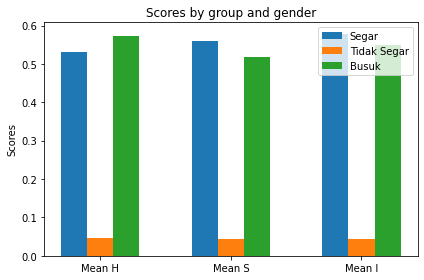

In [12]:
labels = ['Mean H', 'Mean S', 'Mean I']

dataframe = DataFrame['hp']['training'][['h', 's', 'i', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = [np.mean(data_segar['h']), np.mean(data_tidak_segar['h']), np.mean(data_busuk['h'])]
print(h_means)
s_means = [np.mean(data_segar['s']), np.mean(data_tidak_segar['s']), np.mean(data_busuk['s'])]
print(s_means)
i_means = [np.mean(data_segar['i']), np.mean(data_tidak_segar['i']), np.mean(data_busuk['i'])]
print(i_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar')
rects3 = ax.bar(x + width, i_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GRAYSCALE

In [13]:
data_feature_training = DataFrame['hp']['training'][['grayscale',]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['grayscale',]]
data_class_testing = DataFrame['hp']['testing']["class"]


# colors = {0: 'black' , 1 : 'red' , 2: 'blue' ,}
# plt.scatter(data_feature_training['grayscale'],y=""
#             c=[colors[k] for k in data_class_training])

In [14]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        49
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        27

    accuracy                           0.42       116
   macro avg       0.14      0.33      0.20       116
weighted avg       0.18      0.42      0.25       116

[[49  0  0]
 [40  0  0]
 [27  0  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.67      0.54        49
           1       0.35      0.38      0.36        40
           2       0.00      0.00      0.00        27

    accuracy                           0.41       116
   macro avg       0.27      0.35      0.30       116
weighted avg       0.31      0.41      0.35       116

[[33 16  0]
 [25 15  0]
 [15 12  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

0.5419944344925469
0.5316142482383579
0.5736226000816993


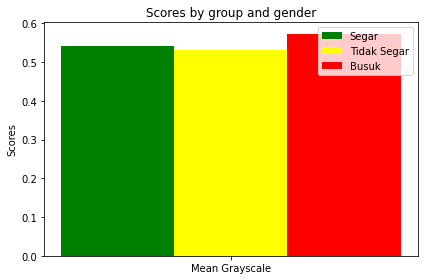

In [16]:
labels = ['Mean Grayscale']

dataframe = DataFrame['hp']['testing'][['grayscale', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = np.mean(data_segar['grayscale'])
print(h_means)
s_means = np.mean(data_tidak_segar['grayscale'])
print(s_means)
i_means = np.mean(data_busuk['grayscale'])
print(i_means)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar', color='green')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar' , color='yellow')
rects3 = ax.bar(x + width, i_means, width, label='Busuk',  color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GLCM

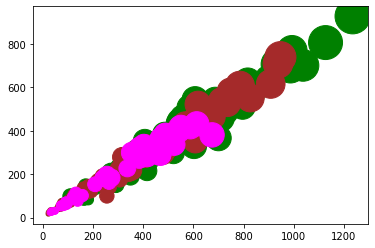

In [17]:
data_feature_training = DataFrame['hp']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    ]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                  ]]
data_class_testing = DataFrame['hp']['testing']["class"]


colors = {0: 'green' , 1 : 'brown' , 2: 'magenta' ,}
plt.scatter(
#             data_feature_training['contrast_00'],
            data_feature_training['contrast_45'],
            data_feature_training['contrast_90'],
            data_feature_training['contrast_135'],
#             data_feature_training['corellation_00'],
#             data_feature_training['corellation_45'],
#             data_feature_training['corellation_90'],
#             data_feature_training['corellation_135'],
#             data_feature_training['homogeneity_00'],
#             data_feature_training['homogeneity_45'],
#             data_feature_training['homogeneity_90'],
#             data_feature_training['homogeneity_135'],
#             data_feature_training['entropy_00'],
#             data_feature_training['entropy_45'],
#             data_feature_training['entropy_90'],
#             data_feature_training['entropy_135'],
#             data_feature_training['variance_00'],
#             data_feature_training['variance_45'],
#             data_feature_training['variance_90'],
#             data_feature_training['variance_135'],
            c=[colors[k] for k in data_class_training])

In [18]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57        49
           1       0.37      0.47      0.41        40
           2       0.00      0.00      0.00        27

    accuracy                           0.44       116
   macro avg       0.29      0.38      0.33       116
weighted avg       0.34      0.44      0.38       116

[[32 17  0]
 [21 19  0]
 [11 16  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.76      0.64        49
           1       0.42      0.53      0.47        40
           2       0.00      0.00      0.00        27

    accuracy                           0.50       116
   macro avg       0.33      0.43      0.37       116
weighted avg       0.38      0.50      0.43       116

[[37 12  0]
 [19 21  0]
 [10 17  0]]


c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# GLCM+RGB

In [20]:
data_feature_training = DataFrame['hp']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                    ]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                  ]]
data_class_testing = DataFrame['hp']['testing']["class"]

In [21]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.65      0.56        49
           1       0.34      0.42      0.38        40
           2       0.00      0.00      0.00        27

    accuracy                           0.42       116
   macro avg       0.27      0.36      0.31       116
weighted avg       0.32      0.42      0.37       116



c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [22]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64        49
           1       0.41      0.50      0.45        40
           2       0.00      0.00      0.00        27

    accuracy                           0.49       116
   macro avg       0.32      0.42      0.36       116
weighted avg       0.37      0.49      0.42       116



c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# GLCM+HSI

In [23]:
data_feature_training = DataFrame['hp']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                    ]]
data_class_training = DataFrame['hp']['training']["class"]
data_feature_testing = DataFrame['hp']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                  ]]
data_class_testing = DataFrame['hp']['testing']["class"]


In [24]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57        49
           1       0.37      0.47      0.41        40
           2       0.00      0.00      0.00        27

    accuracy                           0.44       116
   macro avg       0.29      0.38      0.33       116
weighted avg       0.34      0.44      0.38       116



c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [25]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64        49
           1       0.41      0.50      0.45        40
           2       0.00      0.00      0.00        27

    accuracy                           0.49       116
   macro avg       0.32      0.42      0.36       116
weighted avg       0.37      0.49      0.42       116



c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\fatin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo